Customer Segments

- 이 노트북에서는 고객의 구매에 따라 고객을 분류할 수 있는 가능한 고객 세분화를 찾으려고
노력할 것이다. 이 정보가 다음 예측 작업에 유용하기를 바란다.<br> 데이터 세트에는 수천개의 제품이 있음으로
제품 카테고리를 나타내는 통로에 의존한다. 통로가 있어도 기능이 너무 많아서 주성분 분석을 사용하여
클러스터링이 더 쉬운 새로운 차원을 찾을 것이다. <br> 그런 다음 식별된 클러스터에 대해 가능한 설명을 찾으려고 노력할 것이다. 

## 라이브러리 설치

In [1]:
# import numpy as np
import pandas as pd

from subprocess import check_output 

## 데이터 불러오기 

In [2]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
prior = pd.read_csv('order_products__prior.csv')
prior.tail()

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [4]:
train = pd.read_csv('order_products__train.csv')
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
#커널을 게시하기 위해 이전 데이터 세트를 줄여야하는 행 수 때문에 

prior = prior[0:300000]

In [6]:
prior.shape

(300000, 4)

In [7]:
order_prior = pd.merge(prior, orders, on=['order_id', 'order_id'])
order_prior = order_prior.sort_values(by=['user_id', 'order_id'], ascending=False)
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
111988,11859,34213,1,1,206208,prior,17,1,13,6.0
111989,11859,13176,2,1,206208,prior,17,1,13,6.0
111990,11859,21137,3,1,206208,prior,17,1,13,6.0
111991,11859,23579,4,1,206208,prior,17,1,13,6.0
111992,11859,43295,5,1,206208,prior,17,1,13,6.0


order와 prior를 이너조인 형태로 결합하였다. 

In [8]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
aisles.shape

(134, 2)

In [11]:
_mt = pd.merge(prior, products, on = 'product_id')
_mt = pd.merge(_mt, orders, on='order_id')
mt = pd.merge(_mt, aisles, on='aisle_id')
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


연속적으로 세개의 테이블을 결합시켰다. 

In [12]:
mt['product_name'].nunique()

24836

In [13]:
mt['product_name'].value_counts()[0:10]

Banana                    4432
Bag of Organic Bananas    3563
Organic Strawberries      2370
Organic Baby Spinach      2242
Organic Hass Avocado      1985
Organic Avocado           1626
Large Lemon               1380
Strawberries              1343
Organic Raspberries       1293
Limes                     1270
Name: product_name, dtype: int64

물품의 이름이 너무 많아서 value_counts로 나타내었다. 

In [14]:
len(mt['product_name'].unique())

24836

In [15]:
prior.shape

(300000, 4)

Clustering Customers

In [18]:
len(mt['aisle'].unique())

134

In [19]:
mt['aisle'].value_counts()[0:10]

fresh fruits                     33755
fresh vegetables                 31004
packaged vegetables fruits       16319
yogurt                           13477
packaged cheese                   9133
milk                              8254
water seltzer sparkling water     7634
chips pretzels                    6581
soy lactosefree                   5965
bread                             5457
Name: aisle, dtype: int64

Fresh fruits and fresh vegetables are the best selling goods.

통로에 어떤 아이들이 있는지 알아보았다. (야채칸, 신선한 과일칸, 우유칸 등등`)

여러 고객 중에서 가능한 클러스터를 찾고 단일 user_id를 해당 고객이 속한 것으로 간주되는 클러스터로 대체하고 싶다. 
이것이 결국 다음 예측 모델 성능을 향상시키기를 바란다. <br>

가장 먼저 할 일은 각 사용자가 구매한 모든 데이터 프레임을 만드는 것이다. 

In [20]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
cust_prod.shape

(25831, 134)


그런 다음 얻은 데이터 프레임에 대해 주성분 분석을 실행할 수 있습니다. 이것은 통로의 수에서 내가 선택한 주요 구성 요소의 수인 6으로 기능의 수를 줄입니다.

## 주성분 분석

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [24]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-0.286251,1.005868,-1.030293,-0.898966,-0.587823,-0.998707
1,-1.972748,-0.487659,-0.120541,0.213090,0.045900,-0.182000
2,-1.168974,1.284089,3.228124,0.594046,-0.648800,-1.091841
3,-1.433967,1.250081,3.261985,1.237741,-0.353463,-0.346457
4,-2.070709,-0.422148,-0.101553,0.278160,0.006090,-0.097443



나는 KMeans Clustering에 적합한 것을 찾기 위해 여러 쌍의 구성 요소를 플로팅했습니다. (PC4, PC1) 쌍을 선택했습니다.<br>
각 구성 요소는 원래 데이터 세트의 모든 포인트의 투영이므로 각 구성 요소가 데이터 세트를 대표한다고 생각합니다.

(25831, 2)
          4         1
0 -0.587823  1.005868
1  0.045900 -0.487659
2 -0.648800  1.284089
3 -0.353463  1.250081
4  0.006090 -0.422148


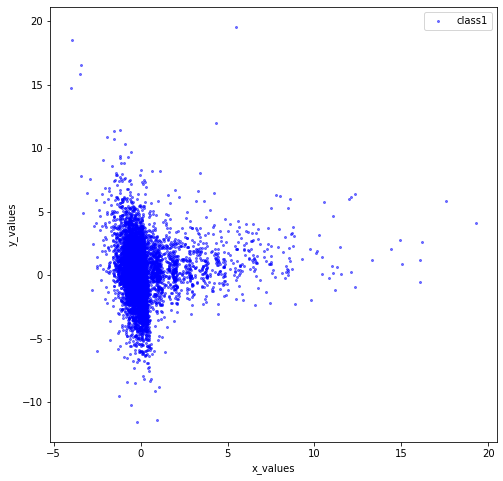

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # matplotlib의 2D 그래프에 3D 오브젝트를 그리도록 해주는 라이브러리입니다
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])
print(tocluster.shape)
print(tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[4], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#silhouette score의 경우는 개별 개체에 대해서 값을 도출할 수 있습니다. sklearn은 각 sample에 대해서 계산할 수 있게도 하고, 평균 값을 내는 것도 지원함.
clusterer = KMeans(n_clusters=4, random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[-0.00793323 -2.39936986]
 [-0.04626443 -0.15452148]
 [-0.24952566  2.06102735]
 [ 5.55592603  1.45663525]]


In [29]:
print(c_preds[0:100])

[2 1 2 2 1 1 1 1 1 1 0 1 2 1 1 3 1 1 2 1 1 1 1 1 1 2 0 1 1 2 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1
 2 2 0 1 1 1 1 1 2 2 1 1 0 2 1 1 1 1 1 2 1 1 2 1 1 1]


['purple', 'blue', 'purple', 'purple', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


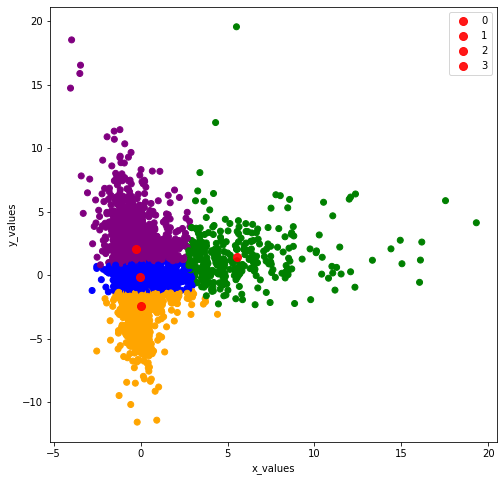

In [35]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[4],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

고객을 위해 가능한 클러스털링을 발견했다. <br>
그 아래에서 흥미로운 패턴을 찾을 수 있는지 확인하자. 

In [37]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] =c_preds

clust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
13,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,4,2
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,2
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
66,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


(25831, 135)


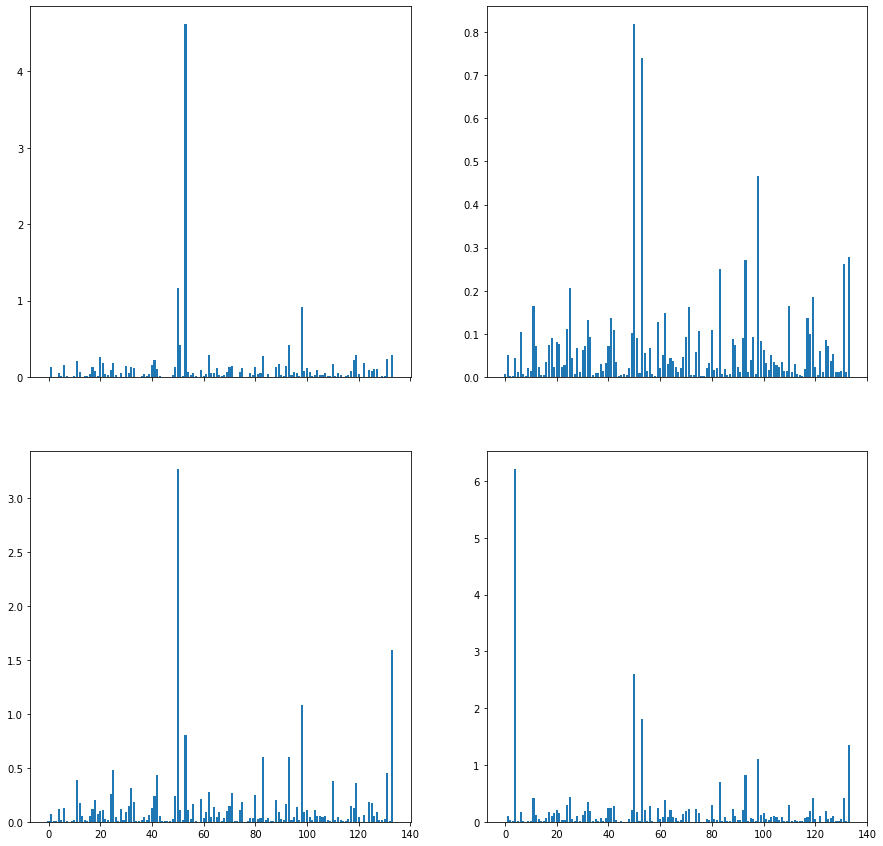

In [39]:
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()

각 클러스터의 사람들이 구매한 상위 10개 상품이 무엇인지 확인해보겠다. <br>
먼저 절대 데이터에 의존한 다음 각 클러스터의 상위 8개 제품 중 백분율에 의존할 것이다. 

In [41]:
c0.sort_values(ascending=False)[0:10]

aisle
fresh vegetables              4.620428
fresh fruits                  1.163216
packaged vegetables fruits    0.922015
packaged cheese               0.423395
fresh herbs                   0.421670
soy lactosefree               0.288475
yogurt                        0.287095
frozen produce                0.282264
milk                          0.279848
canned jarred vegetables      0.261560
dtype: float64

In [44]:
c1.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     0.818765
fresh vegetables                 0.739032
packaged vegetables fruits       0.465411
yogurt                           0.278152
packaged cheese                  0.271190
water seltzer sparkling water    0.262847
milk                             0.249641
chips pretzels                   0.205824
soy lactosefree                  0.185766
refrigerated                     0.164825
dtype: float64

In [43]:
c2.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     3.268080
yogurt                           1.592411
packaged vegetables fruits       1.078795
fresh vegetables                 0.802455
packaged cheese                  0.603571
milk                             0.597768
chips pretzels                   0.481696
water seltzer sparkling water    0.452009
energy granola bars              0.432812
bread                            0.383705
dtype: float64

In [42]:
c3.sort_values(ascending=False)[0:10]

aisle
baby food formula                6.214085
fresh fruits                     2.605634
fresh vegetables                 1.814085
yogurt                           1.343662
packaged vegetables fruits       1.101408
packaged cheese                  0.828169
milk                             0.695775
chips pretzels                   0.430986
soy lactosefree                  0.419718
water seltzer sparkling water    0.419718
dtype: float64

클러스터에 대한 첫번째 분석은 다음과 같은 초기 가설 확인한다


 
    - fresh fruits
    - fresh vegetables
    - packaged vegetables fruits
    - yogurt
    - packaged cheese
    - milk
    - water seltzer sparkling water
    - chips pretzels
    
    
-> 이들은 대다수의 고객이 일반적으로 구매하는 제품이다. 
   
   여기서 조사할 수 있는 것은 이러한 상품과 관련하여 클러스터의 수량과 비율이 다른지
   또는 클러스터가 이 목록에 포함되지 않은 일부 상품으로 특징지어 지는지 여부이다. 
   예를 들어 우리는 이미 클러스터 3이 다른 클러스터와 비교하여 중요한 차이인 
   'Baby Food Formula' 제품이 특징임을 알 수 있다. 


In [45]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])
HTML(cluster_means.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,1.163216,4.620428,0.922015,0.287095,0.423395,0.279848,0.242581,0.188061
1,0.818765,0.739032,0.465411,0.278152,0.271190,0.249641,0.262847,0.205824
2,3.268080,0.802455,1.078795,1.592411,0.603571,0.597768,0.452009,0.481696
3,2.605634,1.814085,1.101408,1.343662,0.828169,0.695775,0.419718,0.430986


다음 표는 각 클러스터의 상위 9개 상품에 대한 이러한 상품의 비율을 나타낸다. 클러스터간에 몇가지 흥미로운 차이가 있다. 

클러스터 1의 사람들은 다른 클러스트보다 더 신선한 야채를 많이 사는 것 같다. 절대 데이터에서 알수 있듯이, 클러스터 1은
다른 어떤 제품보다 훨씬 더 많은 제품을 구입하는 고객을 포함한 클러스터이기도 하다.

클러스터 2의 사람들은 다른 클러스터 사람들보다 요구르트를 더 많이 산다. 

Absolute Data는 클러스터 3의 사람들이 상위 8개 제품에도 포함되지 않았지만 주로 이 클러스터의 특징인 '베이비 푸드 포뮬러'를 많이 구입한다는 것을 보여준다. 이런 관찰로 그들은 다른 사람들보다 우유를 더 많이 산다. 

In [49]:
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x/x.sum())*100, axis=1)
HTML(cluster_perc.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,14.313617,56.855335,11.345590,3.532759,5.209970,3.443591,2.985011,2.314127
1,24.879949,22.457101,14.142517,8.452265,8.240707,7.585883,7.987172,6.254407
2,36.816033,9.039932,12.152987,17.939046,6.799437,6.734058,5.092034,5.426474
3,28.201220,19.634146,11.920732,14.542683,8.963415,7.530488,4.542683,4.664634


클러스터별로 가장 많이 구매한 제품 10~15위를 살펴봄으로써 얻을 수 있는 또 다른 흥미로운 정보에는 일반 제품(야채, 과일, 물 등)

In [50]:
c0.sort_values(ascending=False)[10:15]

aisle
water seltzer sparkling water    0.242581
soup broth bouillon              0.226363
eggs                             0.226363
bread                            0.213251
canned meals beans               0.188751
dtype: float64

In [51]:
c1.sort_values(ascending=False)[10:15]

aisle
bread             0.164272
ice cream ice     0.163499
frozen produce    0.149685
eggs              0.137308
soft drinks       0.136534
dtype: float64

In [52]:
c2.sort_values(ascending=False)[10:15]

aisle
refrigerated       0.381696
soy lactosefree    0.361161
crackers           0.308705
frozen produce     0.277679
ice cream ice      0.266295
dtype: float64

In [53]:
c3.sort_values(ascending=False)[10:15]

aisle
bread             0.414085
frozen produce    0.388732
crackers          0.352113
cereal            0.304225
refrigerated      0.301408
dtype: float64

더 많은 제품 클러스터를 고려했을 때 알 수 있듯이 클러스터가 크게 달라지기 시작한다. 
이 정보가 다음 예측 작업에서 유용하기 바란다. 